In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data file 
df=pd.read_csv(r"C:\Users\SIDDHANT SHELKE\Documents\titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [5]:
# Checking for missing values
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [6]:
# Fill missing 'age' with median (Moderate missing values)
df['age'].fillna(df['age'].median(), inplace=True)

In [7]:
# Fill missing 'embarked' with mode (less missing values)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [8]:
# Drop 'deck' due to excessive missing values
df.drop(columns='deck', inplace=True)

In [9]:
# Statistical summary
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Value counts for categorical columns
print(df['sex'].value_counts())
print(df['pclass'].value_counts())
print(df['embarked'].value_counts())

male      577
female    314
Name: sex, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
S    646
C    168
Q     77
Name: embarked, dtype: int64


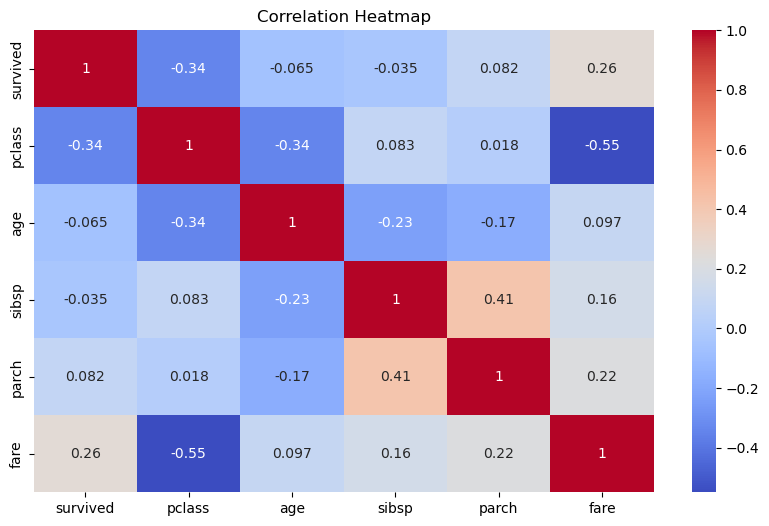

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


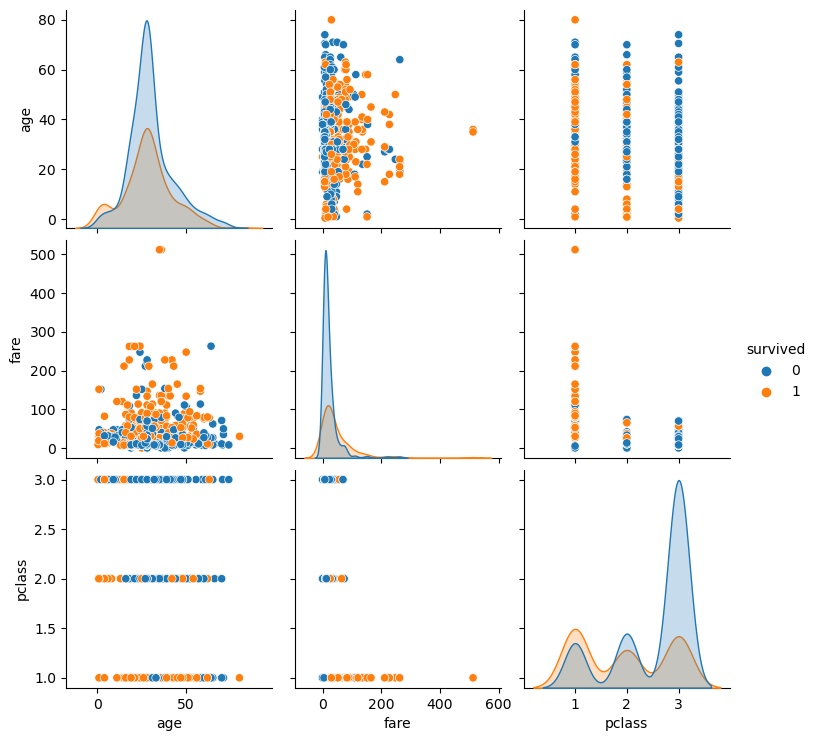

In [12]:
# Pairplot
sns.pairplot(df[['survived','age','fare','pclass','sex']], hue='survived')
plt.show()

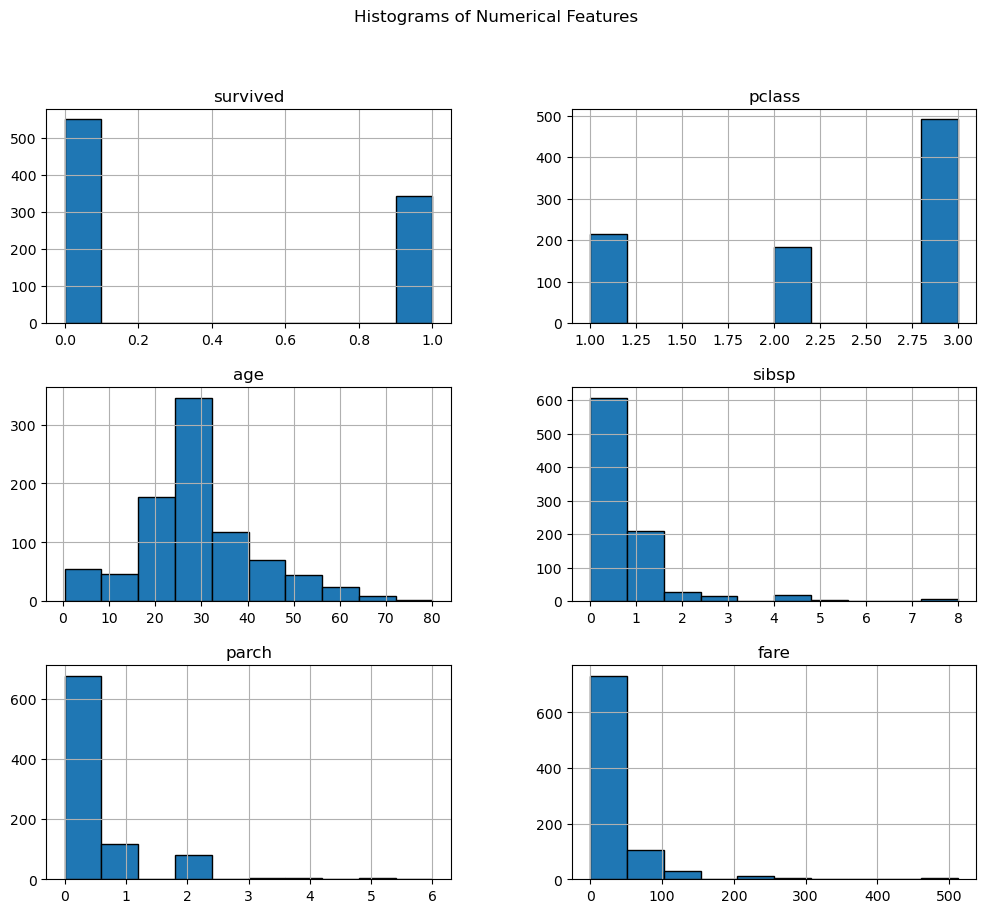

In [13]:
# Histograms
df.hist(figsize=(12,10), edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

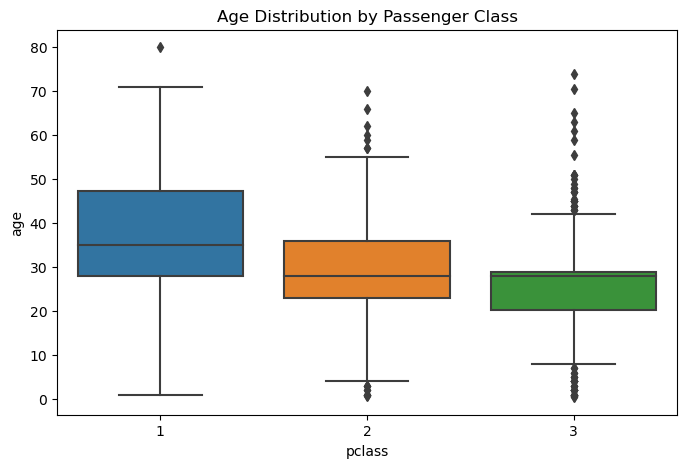

In [14]:
# Boxplots
plt.figure(figsize=(8,5))
sns.boxplot(x='pclass', y='age', data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()


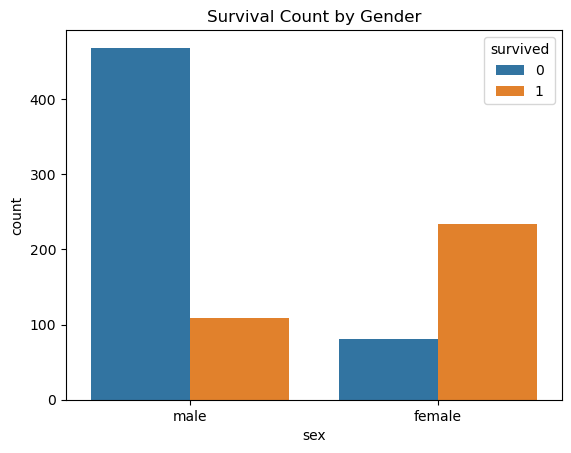

In [15]:
# Bar plot of survival by sex
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

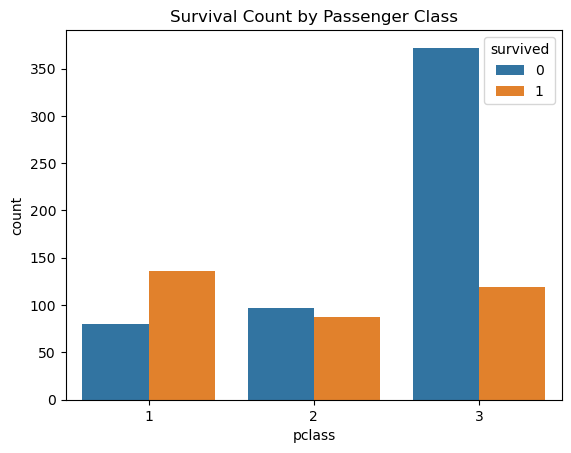

In [16]:
# Bar plot of survival by Pclass
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

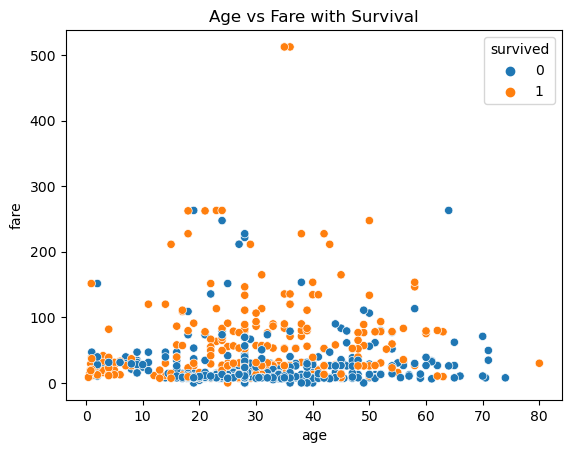

In [17]:
# Scatter plot: Age vs Fare
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare with Survival")
plt.show()

<Axes: xlabel='embarked', ylabel='count'>

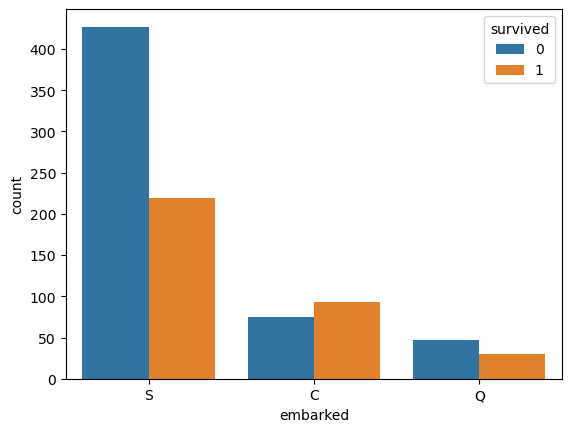

In [18]:
sns.countplot(x='embarked', hue='survived', data=df)


<Axes: xlabel='family_size', ylabel='survived'>

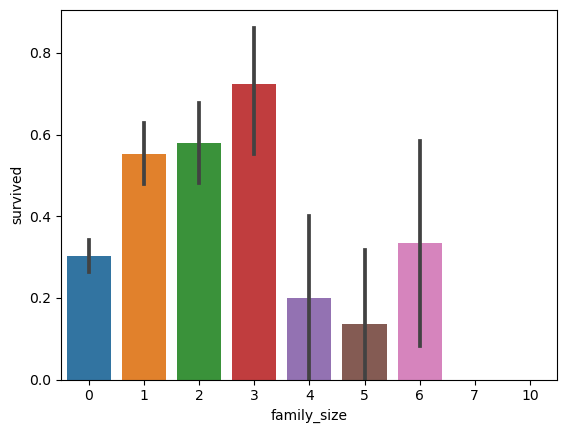

In [19]:
df['family_size'] = df['sibsp'] + df['parch']
sns.barplot(x='family_size', y='survived', data=df)

<Axes: xlabel='pclass', ylabel='fare'>

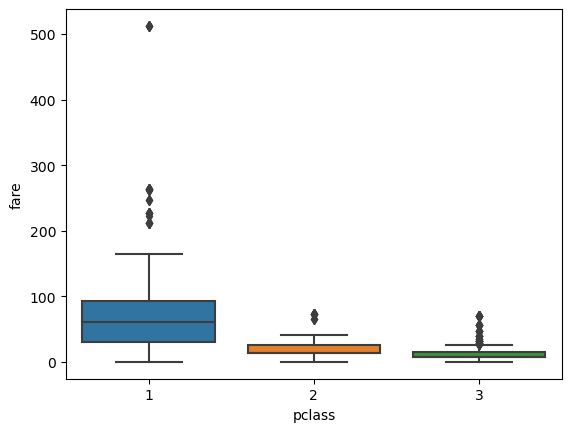

In [20]:
sns.boxplot(x='pclass', y='fare', data=df)


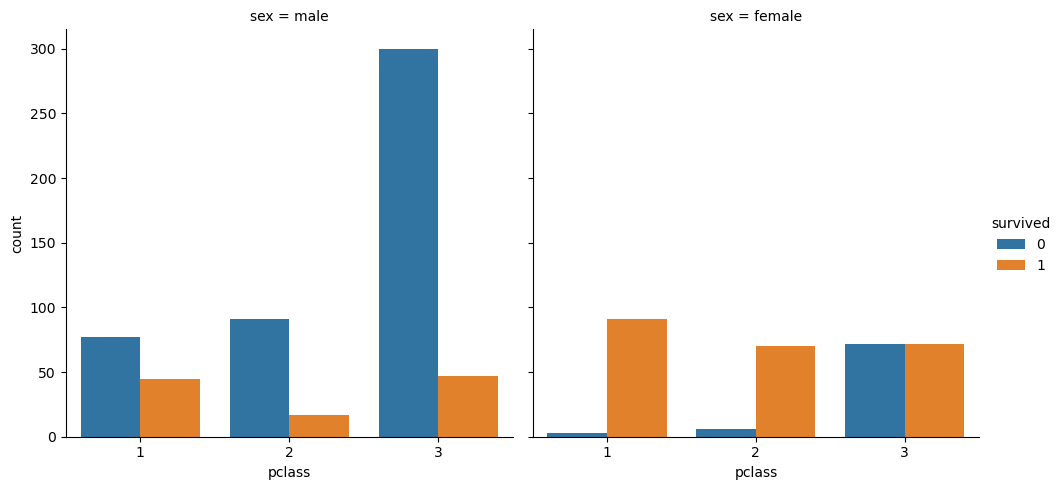

In [21]:
sns.catplot(x='pclass', hue='survived', col='sex', kind='count', data=df)


# Thank You!